## 数据探索

让我们深入研究使用Python进行数据可视化的主要库，以及它们能够生成的各种图表类型。我们还将探讨在不同情况下建议使用哪个库，以及它们各自的独特功能。

我们将从最基本的可视化开始，即数据的初步探索，然后逐渐深入到更复杂的图表和可视化技术。


结构如下：
1. 查看数据
2. pandas_profiling
3. Matplotlib
4. Seaborn

为了展示不同的可视化效果，我们将使用名为"temporal.csv"的数据集。这些数据集都与人工智能领域相关，包括了三个核心术语（数据科学、机器学习和深度学习）在互联网上的搜索流行度数据。

### 1. 查看数据

In [4]:
import pandas as pd
df = pd.read_csv('temporal.csv')
df.head() #View first 10 data rows

,Mes,data science,machine learning,deep learning,categorical
0,2004-01-01,12,18,4,1
1,2004-02-01,12,21,2,1
2,2004-03-01,9,21,2,1
3,2004-04-01,10,16,4,1
4,2004-05-01,7,14,3,1


使用 `describe` 命令，我们将看到数据如何分布，最大值，最小值，均值……

In [6]:
df.describe()

,data science,machine learning,deep learning,categorical
count,194.000000,194.000000,194.000000,194.000000
mean,20.953608,27.396907,24.231959,0.257732
std,23.951006,28.091490,34.476887,0.438517
min,4.000000,7.000000,1.000000,0.000000
25%,6.000000,9.000000,2.000000,0.000000
50%,8.000000,13.000000,3.000000,0.000000
75%,26.750000,31.500000,34.000000,1.000000
max,100.000000,100.000000,100.000000,1.000000


使用 `info` 命令，我们将看到每列包含的数据类型。我们可以发现一列的情况，当使用head命令查看时，该列似乎是数字的，但是如果我们查看后续数据，则字符串格式的值将被编码为字符串。

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Mes               194 non-null    object
 1   data science      194 non-null    int64 
 2   machine learning  194 non-null    int64 
 3   deep learning     194 non-null    int64 
 4   categorical       194 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.7+ KB


通常情况下，pandas都会限制其显示的行数和列数。这可能让很多程序员感到困扰，因为大家都希望能够可视化所有数据。使用这些命令，可以增加限制，可视化整个数据。
对于大型数据集，请谨慎使用此选项，否则可能无法显示它们。

In [10]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

使用Pandas样式，我们可以在查看表格时获得更多信息。首先，我们定义一个格式字典，以便以清晰的方式显示数字（以一定格式显示一定数量的小数、日期和小时，并使用百分比、货币等）。不要惊慌，这是仅显示而不会更改数据，以后再处理也不会有任何问题。

为了给出每种类型的示例，我添加了货币和百分比符号，即使它们对于此数据没有任何意义。

In [11]:
format_dict = {'data science':'${0:,.2f}', 'Mes':'{:%m-%Y}', 'machine learning':'{:.2%}'}
#We make sure that the Month column has datetime format
df['Mes'] = pd.to_datetime(df['Mes'])
#We apply the style to the visualization
df.head().style.format(format_dict)

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,$12.00,1800.00%,4,1
1,02-2004,$12.00,2100.00%,2,1
2,03-2004,$9.00,2100.00%,2,1
3,04-2004,$10.00,1600.00%,4,1
4,05-2004,$7.00,1400.00%,3,1


还可以用颜色突出显示最大值和最小值。

In [12]:
format_dict = {'Mes':'{:%m-%Y}'} #Simplified format dictionary with values that do make sense for our data
df.head().style.format(format_dict).highlight_max(color='darkgreen').highlight_min(color='#ff0000')

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,12,18,4,1
1,02-2004,12,21,2,1
2,03-2004,9,21,2,1
3,04-2004,10,16,4,1
4,05-2004,7,14,3,1


使用颜色渐变来显示数据值。

In [13]:
df.head(10).style.format(format_dict).background_gradient(subset=['data science', 'machine learning'], cmap='BuGn')

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,12,18,4,1
1,02-2004,12,21,2,1
2,03-2004,9,21,2,1
3,04-2004,10,16,4,1
4,05-2004,7,14,3,1
5,06-2004,9,17,3,1
6,07-2004,9,16,3,1
7,08-2004,7,14,3,1
8,09-2004,10,17,4,1
9,10-2004,8,17,4,1


用条形显示数据值。

In [14]:
df.head().style.format(format_dict).bar(color='red', subset=['data science', 'deep learning'])

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,12,18,4,1
1,02-2004,12,21,2,1
2,03-2004,9,21,2,1
3,04-2004,10,16,4,1
4,05-2004,7,14,3,1


### 2. pandas_profiling

pandas_profiling 是一个库，可使用我们的数据生成交互式报告，我们可以看到数据的分布，数据的类型以及可能出现的问题。它非常易于使用，只需三行，我们就可以生成一个报告，该报告可以发送给任何人，即使您不了解编程也可以使用。

In [31]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='report.html')

<ipython-input-31-e909811685f3>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport
Export report to file: 100%|██████████| 1/1 [00:03<00:00,  3.25s/it]


### 3. Matplotlib

Matplotlib是用于以图形方式可视化数据的最基本的库。它包含许多我们可以想到的图形。仅仅因为它是基本的并不意味着它并不强大，我们将要讨论的许多其他数据可视化库都基于它。

Matplotlib的图表由两个主要部分组成，即轴（界定图表区域的线）和图形（我们在其中绘制轴，标题和来自轴区域的东西），现在让我们创建最简单的图：

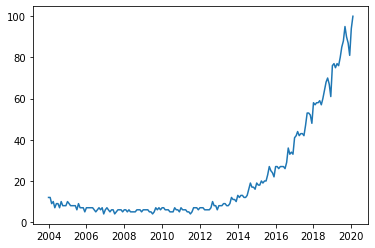

In [18]:
import matplotlib.pyplot as plt
plt.plot(df['Mes'], df['data science'], label='data science') #The parameter label is to indicate the legend. This doesn't mean that it will be shown, we'll have to use another command that I'll explain later.

可以在同一张图中制作多个变量的图，然后进行比较。

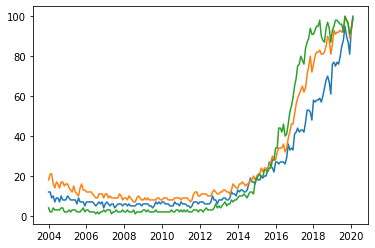

In [19]:
plt.plot(df['Mes'], df['data science'], label='data science')
plt.plot(df['Mes'], df['machine learning'], label='machine learning')
plt.plot(df['Mes'], df['deep learning'], label='deep learning')


添加图例和标题

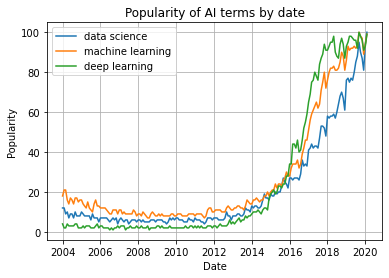

In [20]:
plt.plot(df['Mes'], df['data science'], label='data science')
plt.plot(df['Mes'], df['machine learning'], label='machine learning')
plt.plot(df['Mes'], df['deep learning'], label='deep learning')
plt.xlabel('Date')
plt.ylabel('Popularity')
plt.title('Popularity of AI terms by date')
plt.grid(True)
plt.legend()

可以在一个图形中制作多个图形。这对于比较图表或通过单个图像轻松共享几种图表类型的数据非常有用。

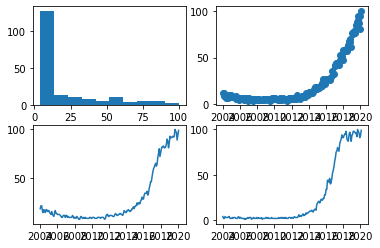

In [21]:
fig, axes = plt.subplots(2,2)
axes[0, 0].hist(df['data science'])
axes[0, 1].scatter(df['Mes'], df['data science'])
axes[1, 0].plot(df['Mes'], df['machine learning'])
axes[1, 1].plot(df['Mes'], df['deep learning'])

可以为每个变量的点绘制具有不同样式的图形：

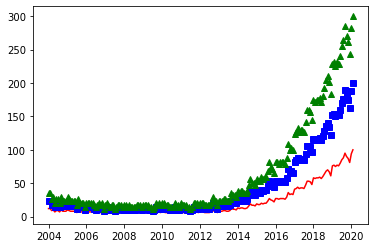

In [22]:
plt.plot(df['Mes'], df['data science'], 'r-')
plt.plot(df['Mes'], df['data science'] * 2, 'bs')
plt.plot(df['Mes'], df['data science'] * 3, 'g^')


散点图

In [ ]:
plt.scatter(df['data science'], df['machine learning'])

条形图

plt.bar（df ['Mes']，df ['machine learning']，width = 20）

直方图

(array([117.,  14.,   5.,   6.,   2.,   3.,   6.,   1.,   2.,   1.,   1.,
          5.,   1.,  13.,  17.]),
 array([  1. ,   7.6,  14.2,  20.8,  27.4,  34. ,  40.6,  47.2,  53.8,
         60.4,  67. ,  73.6,  80.2,  86.8,  93.4, 100. ]),
 <BarContainer object of 15 artists>)

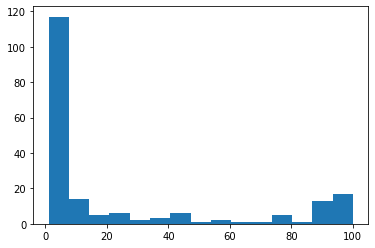

In [23]:
plt.hist(df ['deep learning'],bins = 15)

### 4. Seaborn

Seaborn是基于Matplotlib的库。基本上，它提供给我们的是更好的图形和功能，只需一行代码即可制作复杂类型的图形。

我们导入库并使用sns.set（）初始化图形样式，如果没有此命令，图形将仍然具有与Matplotlib相同的样式。我们显示了最简单的图形之一，散点图

c:\Users\wangj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mes', ylabel='data science'>

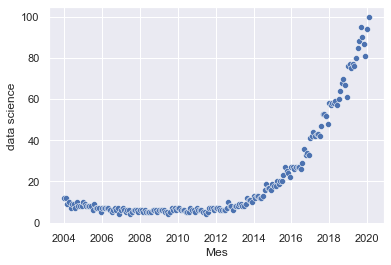

In [24]:
import seaborn as sns
sns.set()
sns.scatterplot(df['Mes'], df['data science'])

可以在同一张图中添加两个以上变量的信息。为此，我们使用颜色和大小。我们还根据类别列的值制作了一个不同的图：

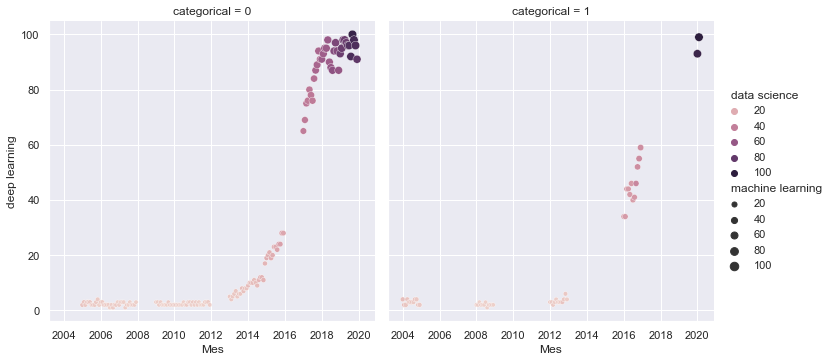

In [25]:
sns.relplot(x='Mes', y='deep learning', hue='data science', size='machine learning', col='categorical', data=df)

热力图

Seaborn提供的最受欢迎的图形之一是热力图。通常使用它来显示数据集中变量之间的所有相关性：

<AxesSubplot:>

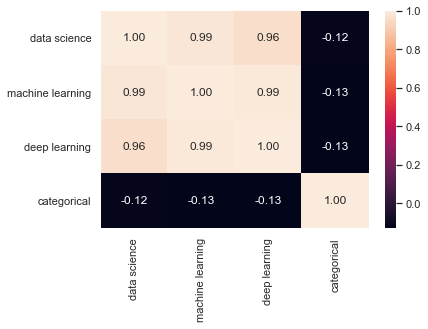

In [26]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')


另一个最受欢迎的是配对图，它向我们显示了所有变量之间的关系。如果您有一个大数据集，请谨慎使用此功能，因为它必须显示所有数据点的次数与有列的次数相同，这意味着通过增加数据的维数，处理时间将成倍增加。

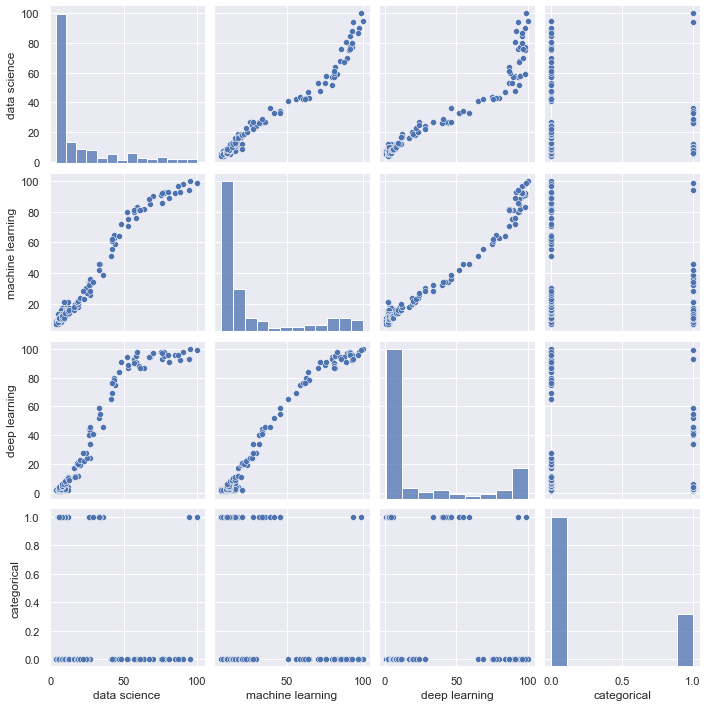

In [28]:
sns.pairplot(df)

联合图

联合图是一个非常有用的图，它使我们可以查看散点图以及两个变量的直方图，并查看它们的分布方式：

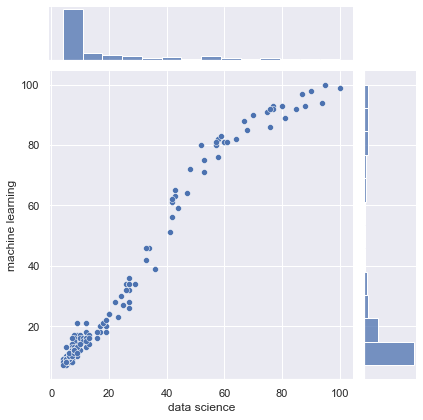

In [29]:
sns.jointplot(x='data science', y='machine learning', data=df)

小提琴图

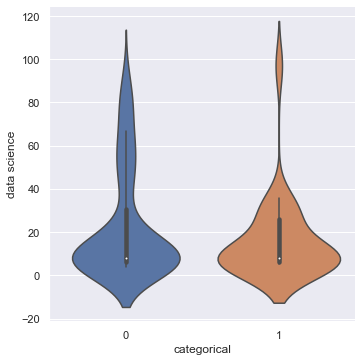

In [30]:
sns.catplot(x='categorical', y='data science', kind='violin', data=df)